In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the csv data file
df = pd.read_csv("C:\\Users\\faiza\\OneDrive\\Desktop\\CO2 Emissions_Canada.csv",encoding="ISO-8859-1")
df

,Make,Model,VehicleClass,EngineSize,Cylinders,Transmission,FuelType,FuelConsumptionCity (L/100 km),FuelConsumptionHwy (L/100 km),FuelConsumptionComb (L/100 km),FuelConsumptionComb,CO2Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
# summarize the data
df.describe()

,EngineSize,Cylinders,FuelConsumptionCity (L/100 km),FuelConsumptionHwy (L/100 km),FuelConsumptionComb (L/100 km),FuelConsumptionComb,CO2Emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [4]:
#columns to work with selected data fields
cdf = df[['EngineSize','Cylinders','FuelConsumptionComb','CO2Emissions']]
cdf.head(10)

,EngineSize,Cylinders,FuelConsumptionComb,CO2Emissions
0,2.0,4,33,196
1,2.4,4,29,221
2,1.5,4,48,136
3,3.5,6,25,255
4,3.5,6,27,244
5,3.5,6,28,230
6,3.5,6,28,232
7,3.7,6,25,255
8,3.7,6,24,267
9,2.4,4,31,212


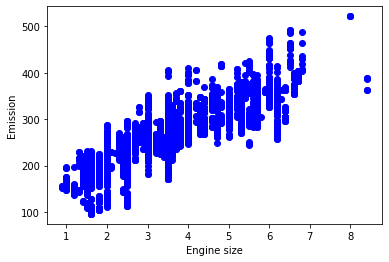

In [5]:
#plot engine size vs the emission, to see how linear is their relation:
plt.scatter(cdf.EngineSize, cdf.CO2Emissions,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [6]:
#train_test_split 80% train data , 20% split data
msk = np.random.rand(len(df)) < 0.8 #np.random.rand() returns value from 0 - 1 eg:0.3434,0.89655,0.53546
train = cdf[msk]                    #msk returns true value ie] < 0.8
test = cdf[~msk]                    #~msk returns false value ie] > 0.8

In [7]:
msk

array([ True,  True,  True, ...,  True,  True,  True])

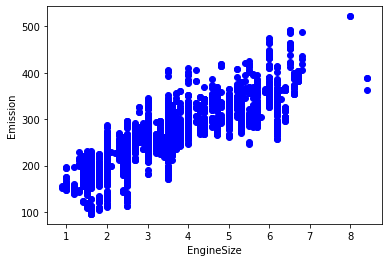

In [8]:
#train data distrubtion
plt.scatter(train.EngineSize, train.CO2Emissions,  color='blue')
plt.xlabel("EngineSize")
plt.ylabel("Emission")
plt.show()                # lower graph: approx value  upper graph: is actual value

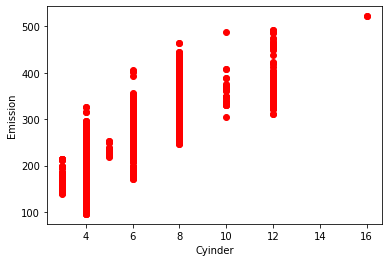

In [9]:
#train data distrubtion
plt.scatter(train.Cylinders, train.CO2Emissions,  color='red')
plt.xlabel("Cyinder")
plt.ylabel("Emission")
plt.show()                

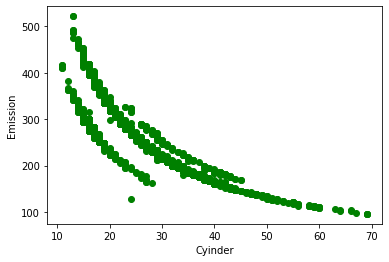

In [10]:
#train data distrubtion
plt.scatter(train.FuelConsumptionComb, train.CO2Emissions,  color='green')
plt.xlabel("Cyinder")
plt.ylabel("Emission")
plt.show()         

# MODEL FOR ENGINESIZE VS CO2 EMISSIONS

In [11]:
# creating a model 
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['EngineSize']]) #asanyarray gives ouput in terms of arry
train_y = np.asanyarray(train[['CO2Emissions']]) 
regr.fit(train_x, train_y)    #trains the module base on previous data
# The coefficients
print ('Coefficients: ',regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[36.76973309]]
Intercept:  [134.39577881]


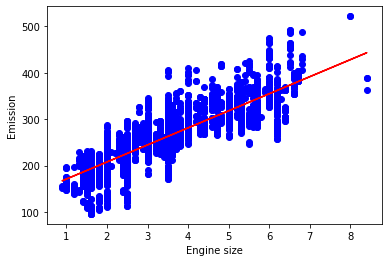

In [12]:
#plotting the fit line
plt.scatter(train.EngineSize, train.CO2Emissions,  color='blue')
plt.plot(train_x , regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #regr.coef_[0][0] choses the first value of coef
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


In [13]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['EngineSize']])
test_y = np.asanyarray(test[['CO2Emissions']])
test_z_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_z_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_z_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_z_) )

Mean absolute error: 22.90
Residual sum of squares (MSE): 905.92
R2-score: 0.73


In [14]:
test_z_

array([[222.64313822],
       [200.58129837],
       [351.33720404],
       ...,
       [207.93524499],
       [207.93524499],
       [207.93524499]])

# MODEL FOR CYLINDRS VS CO2EMISSIONS

In [15]:
# creating a model 
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Cylinders']]) #asanyarray gives ouput in terms of arry
train_y = np.asanyarray(train[['CO2Emissions']]) 
regr.fit(train_x, train_y)    #trains the module base on previous data
# The coefficients
print ('Coefficients: ',regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[26.49038174]]
Intercept:  [102.01324572]


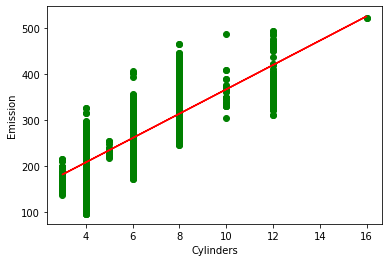

In [16]:
#plotting the fit line
plt.scatter(train.Cylinders, train.CO2Emissions,  color='green')
plt.plot(train_x , regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #regr.coef_[0][0] choses the first value of coef
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Cylinders']])
test_y = np.asanyarray(test[['CO2Emissions']])
test_Y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_Y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_Y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_Y_) )

Mean absolute error: 23.66
Residual sum of squares (MSE): 973.09
R2-score: 0.71


In [18]:
test_Y_

array([[207.97477267],
       [207.97477267],
       [419.89782655],
       ...,
       [207.97477267],
       [207.97477267],
       [207.97477267]])

# MODEL FOR FUEL VS CO2EMISSION

In [19]:
# creating a model 
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FuelConsumptionComb']]) #asanyarray gives ouput in terms of arry
train_y = np.asanyarray(train[['CO2Emissions']]) 
regr.fit(train_x, train_y)    #trains the module base on previous data
# The coefficients
print ('Coefficients: ',regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-7.33890991]]
Intercept:  [452.41589572]


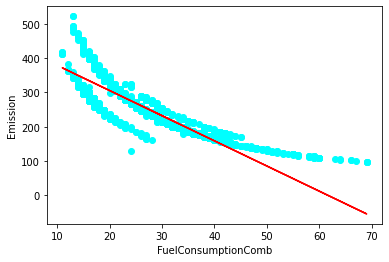

In [20]:
#plotting the fit line
plt.scatter(train.FuelConsumptionComb, train.CO2Emissions,  color='aqua')
plt.plot(train_x , regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #regr.coef_[0][0] choses the first value of coef
plt.xlabel("FuelConsumptionComb")
plt.ylabel("Emission")
plt.show()

In [21]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FuelConsumptionComb']])
test_y = np.asanyarray(test[['CO2Emissions']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )


Mean absolute error: 15.44
Residual sum of squares (MSE): 533.76
R2-score: 0.84


In [22]:
test_y_

array([[239.58750837],
       [202.89295883],
       [320.31551737],
       ...,
       [239.58750837],
       [224.90968856],
       [239.58750837]])

In [23]:
test_y

array([[225],
       [193],
       [359],
       ...,
       [223],
       [210],
       [232]], dtype=int64)

In [24]:
regr.score(test_x,test_y)

0.8391774488737466